## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Importing Dataset

In [3]:
df = pd.read_csv("Wholesale customers data.csv")

df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


## Data Exploration

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [5]:
## Checking Nulls

df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [6]:
## Checking Duplicates

df.duplicated().sum()

0

## Univariate Analysis

### Checking Data Distribution of Channel 

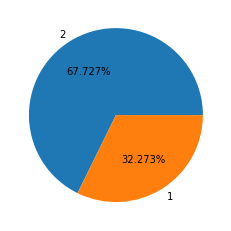

In [7]:
plt.pie(df.Channel.value_counts(),
       labels = df.Channel.unique(),
       autopct = '%0.3f%%');

### Checking Data Distribution of Region

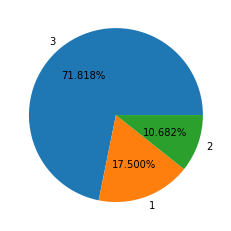

In [8]:
plt.pie(df.Region.value_counts(),
       labels = df.Region.unique(),
       autopct = '%0.3f%%');

Severe Class Imbalance

### Checking total unique values in different columns

In [9]:
for col in df.iloc[:, 2:].columns:
    print("Total Unique values in ", col)
    a = df[col].nunique()
    print(a, '\n', "*"*40)

Total Unique values in  Fresh
433 
 ****************************************
Total Unique values in  Milk
421 
 ****************************************
Total Unique values in  Grocery
430 
 ****************************************
Total Unique values in  Frozen
426 
 ****************************************
Total Unique values in  Detergents_Paper
417 
 ****************************************
Total Unique values in  Delicassen
403 
 ****************************************


### Checking Data Distribution

Feature:  Fresh


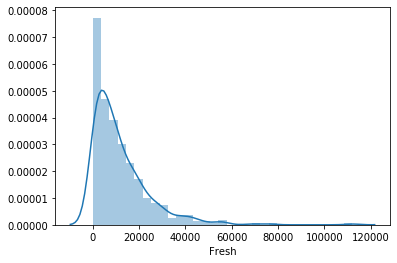

*****************************************************************************************************************************
Feature:  Milk


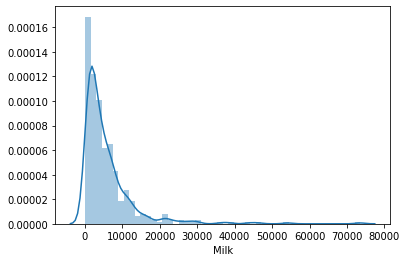

*****************************************************************************************************************************
Feature:  Grocery


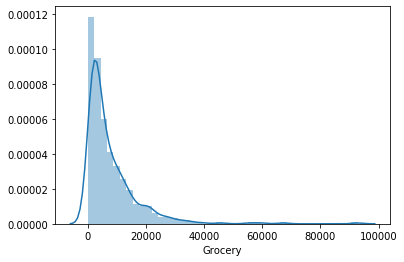

*****************************************************************************************************************************
Feature:  Frozen


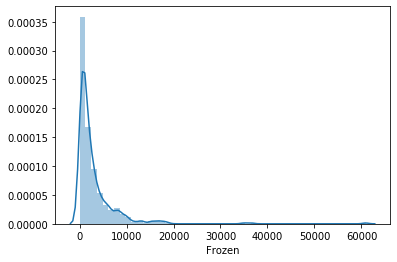

*****************************************************************************************************************************
Feature:  Detergents_Paper


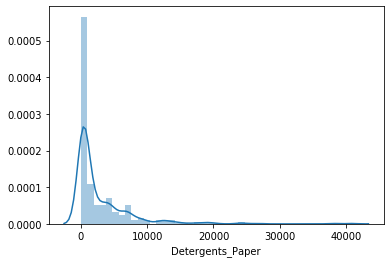

*****************************************************************************************************************************
Feature:  Delicassen


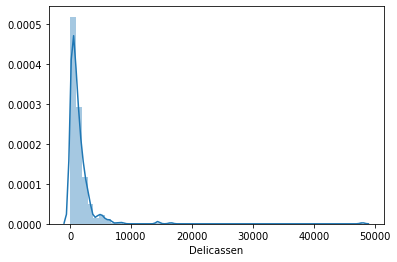

*****************************************************************************************************************************


In [10]:
for col in df.iloc[:, 2:].columns:
    print("Feature: ", col)
    sns.distplot(df[col])
    plt.show()
    print("*"*125)

### Boxplots

Feature:  Fresh


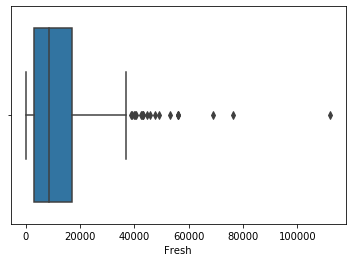

*****************************************************************************************************************************
Feature:  Milk


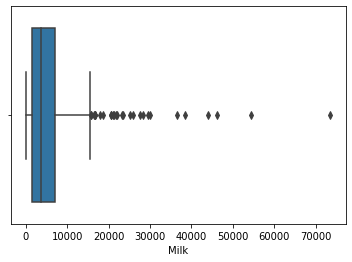

*****************************************************************************************************************************
Feature:  Grocery


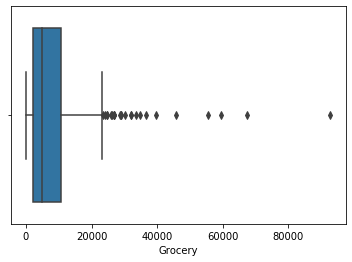

*****************************************************************************************************************************
Feature:  Frozen


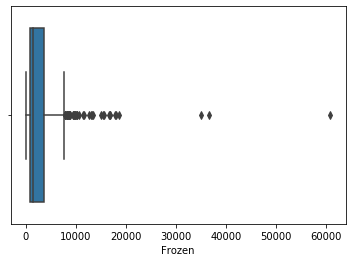

*****************************************************************************************************************************
Feature:  Detergents_Paper


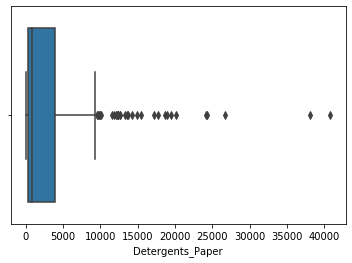

*****************************************************************************************************************************
Feature:  Delicassen


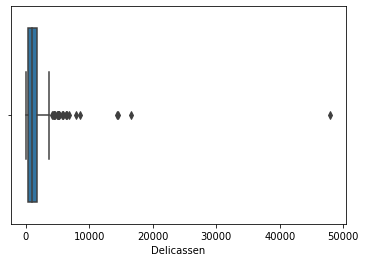

*****************************************************************************************************************************


In [11]:
for col in df.iloc[:, 2:].columns:
    print("Feature: ", col)
    sns.boxplot(df[col])
    plt.show()
    print("*"*125)

Leaving the outliers as such

## Bivariate Analysis

In [12]:
df.groupby(['Channel', 'Region'])['Milk'].sum().to_frame()

Milk
Channel Region         
1       1        228342
        2         64519
        3        735753
2       1        194112
        2        174625
        3       1153006

In [13]:
df.groupby(['Channel', 'Region'])['Fresh'].sum().to_frame()

Fresh
Channel Region         
1       1        761233
        2        326215
        3       2928269
2       1         93600
        2        138506
        3       1032308

In [14]:
df.groupby(['Channel', 'Region'])['Grocery'].sum().to_frame()

Grocery
Channel Region         
1       1        237542
        2        123074
        3        820101
2       1        332495
        2        310200
        3       1675150

In [15]:
df.groupby(['Channel', 'Region'])['Frozen'].sum().to_frame()

Frozen
Channel Region        
1       1       184512
        2       160861
        3       771606
2       1        46514
        2        29271
        3       158886

In all the above cases, Region 3 shows max and this can be due to high class imbalance

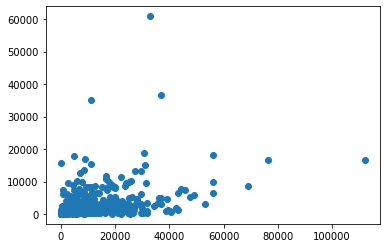

In [16]:
plt.scatter(df.Fresh, df.Frozen)
plt.show()

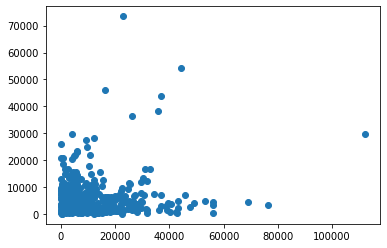

In [17]:
plt.scatter(df.Fresh, df.Milk)
plt.show()

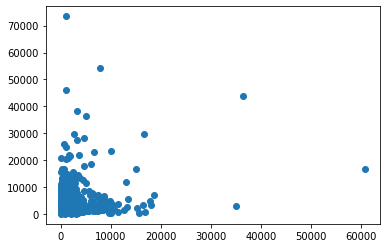

In [18]:
plt.scatter(df.Frozen, df.Milk)
plt.show()

### Checking Correlation

In [19]:
df.corr()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


## Preprocessing

### Scaling

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_data = scaler.fit_transform(df)

### PCA

In [21]:
from sklearn.decomposition import PCA

In [22]:
pca = PCA(n_components=4)

principalComponents = pca.fit_transform(scaled_data)

principalComponents

array([[ 0.84393893, -0.51535075, -0.76763222, -0.0442148 ],
       [ 1.06267645, -0.48460126, -0.67297526,  0.40137178],
       [ 1.26914052,  0.68205455, -0.6640946 ,  1.63495276],
       ...,
       [ 3.86514909, -0.47985376, -0.52534452, -0.68713197],
       [-1.09706738, -0.06989568, -0.63012755,  0.31182088],
       [-1.16595067, -0.90215675, -0.59770486,  0.34265555]])

### Creating new dataframe after PCA transformation

In [23]:
principal_df = pd.DataFrame(data = principalComponents
                           , columns = ['pc1','pc2', 'pc3', 'pc4'])
                           
principal_df

,pc1,pc2,pc3,pc4
0,0.843939,-0.515351,-0.767632,-0.044215
1,1.062676,-0.484601,-0.672975,0.401372
2,1.269141,0.682055,-0.664095,1.634953
3,-1.056782,0.610821,-0.505654,0.196005
4,0.634030,0.974199,-0.771209,0.186374
...,...,...,...,...
435,0.222884,2.480505,-0.360936,-0.601036
436,-1.290172,1.560397,-0.756171,-1.342401
437,3.865149,-0.479854,-0.525345,-0.687132
438,-1.097067,-0.069896,-0.630128,0.311821


## Model Building

### DBSCAN

In [24]:
from sklearn.cluster import DBSCAN

In [25]:
dbs = DBSCAN()

In [26]:
y_pred = dbs.fit_predict(principal_df)


y_pred

array([ 0,  0, -1,  1, -1,  0,  0,  0,  1,  0,  0,  1, -1, -1, -1,  1,  0,
        1,  0,  1,  0,  1, -1, -1, -1,  0,  1,  1, -1,  2,  1,  1,  1,  1,
        1,  0,  1,  0,  0, -1, -1,  1, -1,  0,  0, -1,  0, -1,  0, -1,  1,
        1, -1,  0,  1,  1, -1,  0,  1,  1,  0, -1,  0,  0,  1, -1,  1, -1,
        1,  1,  1, -1,  1, -1,  0,  1,  1, -1,  1,  1,  1,  0,  0,  1,  0,
       -1, -1, -1,  1,  1,  1,  1, -1, -1,  0,  1,  0,  1,  1,  1, -1,  0,
        0, -1,  1,  1,  0,  0,  0,  0,  1,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  0, -1, -1,  1,  0,  1,  2,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  0,  0,  1,  0,  0,  0,  1,  1, -1,  0, -1,  0,  1,  1,  1,
        0, -1,  1,  0,  1,  0, -1,  1,  1,  1,  1, -1,  0, -1,  1,  1,  1,
        1,  0,  0,  1,  1,  1,  0,  1,  1, -1, -1,  3,  3, -1, -1, -1,  3,
        3, -1,  3, -1,  3, -1,  3, -1,  3,  3, -1, -1, -1,  3, -1,  3,  3,
       -1,  3,  3,  3,  3

In [27]:
??dbs

In [28]:
principal_df["clusters"] = y_pred

principal_df.head()

,pc1,pc2,pc3,pc4,clusters
0,0.843939,-0.515351,-0.767632,-0.044215,0
1,1.062676,-0.484601,-0.672975,0.401372,0
2,1.269141,0.682055,-0.664095,1.634953,-1
3,-1.056782,0.610821,-0.505654,0.196005,1
4,0.634030,0.974199,-0.771209,0.186374,-1


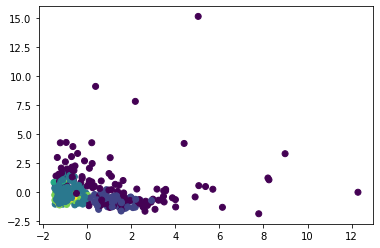

In [29]:
plt.scatter(principal_df.pc1, principal_df.pc2, c = principal_df.clusters)

Overlapping Clusters obtained

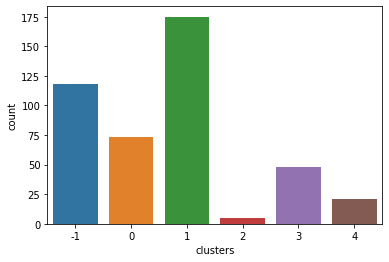

In [30]:
sns.countplot(principal_df.clusters)

In [31]:
import sklearn.metrics

sklearn.metrics.davies_bouldin_score(principal_df, y_pred)

1.1509193582721715